<h1>MODUL 3</h1>

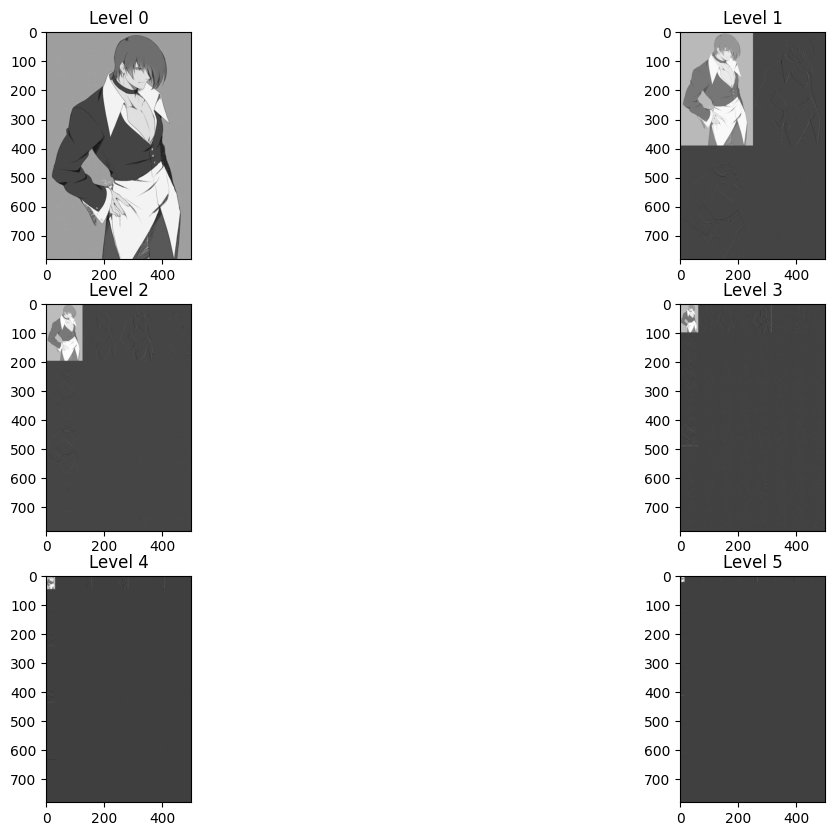

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def haar_wavelet_transform(image):
    rows, cols = image.shape
    output = np.zeros((rows, cols))
    
    for i in range(0, rows, 2):
        for j in range(0, cols, 2):
            output[i//2, j//2] = (image[i, j] + image[i, j+1] + image[i+1, j] + image[i+1, j+1]) / 2
            output[i//2, j//2 + cols//2] = (image[i, j] - image[i, j+1] + image[i+1, j] - image[i+1, j+1]) / 2
            output[i//2 + rows//2, j//2] = (image[i, j] + image[i, j+1] - image[i+1, j] - image[i+1, j+1]) / 2
            output[i//2 + rows//2, j//2 + cols//2] = (image[i, j] - image[i, j+1] - image[i+1, j] + image[i+1, j+1]) / 2
    
    return output

def image_decomposition(image_path, max_level):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img / 255.0
    
    decomposed_images = {'Level_0': img}
    
    for level in range(max_level):
        img = haar_wavelet_transform(img)
        decomposed_images[f'Level_{level+1}'] = np.copy(img)
    
    return decomposed_images

image_path = 'IoriYagami.jpg'
max_level = 5

decomposed_images = image_decomposition(image_path, max_level)

level_0_img = decomposed_images['Level_0']
level_1_img = decomposed_images['Level_1']
level_2_img = decomposed_images['Level_2']
level_3_img = decomposed_images['Level_3']
level_4_img = decomposed_images['Level_4']
level_5_img = decomposed_images['Level_5']

# Example display of the images
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(level_0_img, cmap='gray')
plt.title('Level 0')
# plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(level_1_img, cmap='gray')
plt.title('Level 1')
# plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(level_2_img, cmap='gray')
plt.title('Level 2')
# plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(level_3_img, cmap='gray')
plt.title('Level 3')
# plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(level_4_img, cmap='gray')
plt.title('Level 4')
# plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(level_5_img, cmap='gray')
plt.title('Level 5')
# plt.axis('off')

plt.show()
